# Questions:

        1. What is the average age of male and Female employees in the dataset?
        2. Which department has the highest number of employees?
        3. What is the most common job title in the dataset?
        4. Are there any employees who have exited the company? If so, how many?
        5. What is the total annual salary paid out to all employees in the dataset?
        6. Which business unit has the highest average bonus payout?
        7. How many male vs female employees are in the dataset?
        8. What is the earliest hire date in the dataset?
        9. Which country has the highest number of employees?
        10. Are there any outliers in the annual salary column? If so, what are they?
        11. How many employees have a job title that includes the word "manager"?
        12. How does the salary of employees depand on number of years employees have been with the company?
        13. What is the average salary for employees with a job title that includes the word "manager"?
        14. How many employees have been with the company for more than 10 years?
        15. How many employees have a job title that includes the word "analyst"?
        16. What is the average age of employees by business unit?
        17. How many employees have a bonus greater than 10%?
        18. How many employees were hired in 2022 and comper with ather years?
        19. What is the highest annual salary in the dataset and which employee earned it?
        20. Are there any correlations between age, annual salary, and bonus payout among employees in the dataset?
 

# Import Library 

In [527]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [528]:
df = pd.read_csv('EmployeeData.csv', encoding='ISO-8859-1')
df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47.0,2/5/2022,"$92,368",0%,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58.0,10/23/2013,"$45,703",0%,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34.0,3/24/2019,"$83,576",0%,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39.0,4/7/2018,"$98,062",0%,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42.0,6/18/2005,"$175,391",24%,United States,Austin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,E02250,Mila Han,Manager,Sales,Manufacturing,Female,Asian,54.0,11/14/2009,"$128,791",6%,United States,Miami,NaN
1258,E02251,Genesis Herrera,Manager,IT,Research & Development,Female,Latino,34.0,10/3/2015,"$126,898",10%,Brazil,Manaus,NaN
1259,E02252,Olivia Vazquez,Network Engineer,IT,Specialty Products,Female,Latino,53.0,4/13/2020,"$93,053",0%,Brazil,Sao Paulo,NaN
1260,E02253,Leilani Ng,Systems Analyst,IT,Corporate,Female,Asian,48.0,9/19/2011,"$50,513",0%,United States,Seattle,10/30/2019


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    1243 non-null   object 
 1   Full Name      1222 non-null   object 
 2   Job Title      1204 non-null   object 
 3   Department     1215 non-null   object 
 4   Business Unit  1180 non-null   object 
 5   Gender         1213 non-null   object 
 6   Ethnicity      1220 non-null   object 
 7   Age            1256 non-null   float64
 8   Hire Date      1227 non-null   object 
 9   Annual Salary  1189 non-null   object 
 10  Bonus %        1214 non-null   object 
 11  Country        1156 non-null   object 
 12  City           1207 non-null   object 
 13  Exit Date      125 non-null    object 
dtypes: float64(1), object(13)
memory usage: 138.2+ KB


# Cleaning Data

In [530]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    1108 non-null   object 
 1   Full Name      1087 non-null   object 
 2   Job Title      1069 non-null   object 
 3   Department     1080 non-null   object 
 4   Business Unit  1045 non-null   object 
 5   Gender         1078 non-null   object 
 6   Ethnicity      1085 non-null   object 
 7   Age            1121 non-null   float64
 8   Hire Date      1092 non-null   object 
 9   Annual Salary  1054 non-null   object 
 10  Bonus %        1079 non-null   object 
 11  Country        1021 non-null   object 
 12  City           1072 non-null   object 
 13  Exit Date      115 non-null    object 
dtypes: float64(1), object(13)
memory usage: 132.1+ KB


In [531]:
# Replace missing age values with the mean age
if df['Age'].isnull().sum() > 0:
    mean_age = np.mean(df['Age'])
    df['Age'].fillna(mean_age, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employee ID    1108 non-null   object 
 1   Full Name      1087 non-null   object 
 2   Job Title      1069 non-null   object 
 3   Department     1080 non-null   object 
 4   Business Unit  1045 non-null   object 
 5   Gender         1078 non-null   object 
 6   Ethnicity      1085 non-null   object 
 7   Age            1127 non-null   float64
 8   Hire Date      1092 non-null   object 
 9   Annual Salary  1054 non-null   object 
 10  Bonus %        1079 non-null   object 
 11  Country        1021 non-null   object 
 12  City           1072 non-null   object 
 13  Exit Date      115 non-null    object 
dtypes: float64(1), object(13)
memory usage: 132.1+ KB


In [532]:
# change the data type of the Age column to int
df['Age'] = df['Age'].astype(int)

# Convert the Hire Date and Exit Date column to datetime format
df['Hire Date'] = pd.to_datetime(df['Hire Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    1108 non-null   object        
 1   Full Name      1087 non-null   object        
 2   Job Title      1069 non-null   object        
 3   Department     1080 non-null   object        
 4   Business Unit  1045 non-null   object        
 5   Gender         1078 non-null   object        
 6   Ethnicity      1085 non-null   object        
 7   Age            1127 non-null   int32         
 8   Hire Date      1092 non-null   datetime64[ns]
 9   Annual Salary  1054 non-null   object        
 10  Bonus %        1079 non-null   object        
 11  Country        1021 non-null   object        
 12  City           1072 non-null   object        
 13  Exit Date      115 non-null    object        
dtypes: datetime64[ns](1), int32(1), object(12)
memory usage: 127.7+ KB


In [533]:
if df['Annual Salary'].notnull().sum() > 0:
    # Replace the dollar sign and coma character with an empty string in the 'Annual Salary' column
    df['Annual Salary'] = df['Annual Salary'].astype(str)
    df['Annual Salary'] = df['Annual Salary'].str.replace('$', '', regex=False)
    df['Annual Salary'] = df['Annual Salary'].str.replace(',', '', regex=False)
    df['Annual Salary'] = df['Annual Salary'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    1108 non-null   object        
 1   Full Name      1087 non-null   object        
 2   Job Title      1069 non-null   object        
 3   Department     1080 non-null   object        
 4   Business Unit  1045 non-null   object        
 5   Gender         1078 non-null   object        
 6   Ethnicity      1085 non-null   object        
 7   Age            1127 non-null   int32         
 8   Hire Date      1092 non-null   datetime64[ns]
 9   Annual Salary  1054 non-null   float64       
 10  Bonus %        1079 non-null   object        
 11  Country        1021 non-null   object        
 12  City           1072 non-null   object        
 13  Exit Date      115 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(11)
memory usage: 127

In [534]:
# Replace missing age values with the mean Annual Salary
if df['Annual Salary'].isnull().sum() > 0:
    mean = np.mean(df['Annual Salary'])
    df['Annual Salary'].fillna(mean, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    1108 non-null   object        
 1   Full Name      1087 non-null   object        
 2   Job Title      1069 non-null   object        
 3   Department     1080 non-null   object        
 4   Business Unit  1045 non-null   object        
 5   Gender         1078 non-null   object        
 6   Ethnicity      1085 non-null   object        
 7   Age            1127 non-null   int32         
 8   Hire Date      1092 non-null   datetime64[ns]
 9   Annual Salary  1127 non-null   float64       
 10  Bonus %        1079 non-null   object        
 11  Country        1021 non-null   object        
 12  City           1072 non-null   object        
 13  Exit Date      115 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(11)
memory usage: 127

In [535]:
if df['Bonus %'].notnull().sum() > 0:
    df['Bonus %'] = df['Bonus %'].astype(str)
    # Replace the % character with an empty string in the 'Bonus %' column
    df['Bonus %'] = df['Bonus %'].str.replace('%', '', regex=False)
      # change the data type of the Bonus % column to str
    df['Bonus %'] = df['Bonus %'].astype(float)

df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47,2022-02-05,92368.0,0.0,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58,2013-10-23,45703.0,0.0,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34,2019-03-24,83576.0,0.0,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39,2018-04-07,98062.0,0.0,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42,2005-06-18,175391.0,24.0,United States,Austin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,E02022,Eli Dang,Sr. Manager,Accounting,Specialty Products,Male,Asian,45,2015-11-16,122875.0,12.0,NaN,NaN,NaN
1194,E02023,Lillian Lewis,Technical Architect,IT,Research & Development,Female,Black,43,2013-08-14,83323.0,0.0,NaN,NaN,NaN
1195,E02024,Serenity Cao,Account Representative,Sales,Manufacturing,Female,Asian,31,2018-10-21,66721.0,0.0,NaN,NaN,NaN
1196,E02025,Parker Lai,Vice President,Accounting,Specialty Products,Male,Asian,48,2006-11-29,246400.0,36.0,NaN,NaN,NaN


In [536]:
if df['Bonus %'].isnull().sum() > 0:
    mean = np.mean(df['Bonus %'])
    df['Bonus %'].fillna(mean, inplace=True)
df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47,2022-02-05,92368.0,0.0,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58,2013-10-23,45703.0,0.0,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34,2019-03-24,83576.0,0.0,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39,2018-04-07,98062.0,0.0,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42,2005-06-18,175391.0,24.0,United States,Austin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,E02022,Eli Dang,Sr. Manager,Accounting,Specialty Products,Male,Asian,45,2015-11-16,122875.0,12.0,NaN,NaN,NaN
1194,E02023,Lillian Lewis,Technical Architect,IT,Research & Development,Female,Black,43,2013-08-14,83323.0,0.0,NaN,NaN,NaN
1195,E02024,Serenity Cao,Account Representative,Sales,Manufacturing,Female,Asian,31,2018-10-21,66721.0,0.0,NaN,NaN,NaN
1196,E02025,Parker Lai,Vice President,Accounting,Specialty Products,Male,Asian,48,2006-11-29,246400.0,36.0,NaN,NaN,NaN


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    1108 non-null   object        
 1   Full Name      1087 non-null   object        
 2   Job Title      1069 non-null   object        
 3   Department     1080 non-null   object        
 4   Business Unit  1045 non-null   object        
 5   Gender         1078 non-null   object        
 6   Ethnicity      1085 non-null   object        
 7   Age            1127 non-null   int32         
 8   Hire Date      1092 non-null   datetime64[ns]
 9   Annual Salary  1127 non-null   float64       
 10  Bonus %        1127 non-null   float64       
 11  Country        1021 non-null   object        
 12  City           1072 non-null   object        
 13  Exit Date      115 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 127

## Using Machine Learning to Fill the missing values in Country column depend on City column

In [538]:
from sklearn.linear_model import LinearRegression

# Subset the dataset to only the relevant columns
subset_df = df[['Country', 'City']]

# Split the data into training and testing sets
train_data = subset_df[~subset_df['Country'].isnull()]
test_data = subset_df[subset_df['Country'].isnull()]

# Create a dictionary mapping cities to their most common country value
city_to_country = train_data.groupby('City')['Country'].apply(lambda x: x.mode()[0]).to_dict()

# Fill in missing values in the test data using the city-to-country mapping
test_data = test_data.assign(Country=test_data['City'].map(city_to_country))

# Drop any rows with missing data
imputed_df = pd.concat([train_data, test_data])
imputed_df.dropna(subset=['City'],inplace=True)

df[['Country', 'City']] = imputed_df[['Country', 'City']]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 0 to 1197
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    1108 non-null   object        
 1   Full Name      1087 non-null   object        
 2   Job Title      1069 non-null   object        
 3   Department     1080 non-null   object        
 4   Business Unit  1045 non-null   object        
 5   Gender         1078 non-null   object        
 6   Ethnicity      1085 non-null   object        
 7   Age            1127 non-null   int32         
 8   Hire Date      1092 non-null   datetime64[ns]
 9   Annual Salary  1127 non-null   float64       
 10  Bonus %        1127 non-null   float64       
 11  Country        1072 non-null   object        
 12  City           1072 non-null   object        
 13  Exit Date      115 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 127

In [539]:
df.head()

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47,2022-02-05,92368.0,0.0,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58,2013-10-23,45703.0,0.0,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34,2019-03-24,83576.0,0.0,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39,2018-04-07,98062.0,0.0,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42,2005-06-18,175391.0,24.0,United States,Austin,NaN


In [541]:
# drop rows with missing values
df.dropna(subset=df.columns[:-1], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855 entries, 0 to 1136
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    855 non-null    object        
 1   Full Name      855 non-null    object        
 2   Job Title      855 non-null    object        
 3   Department     855 non-null    object        
 4   Business Unit  855 non-null    object        
 5   Gender         855 non-null    object        
 6   Ethnicity      855 non-null    object        
 7   Age            855 non-null    int32         
 8   Hire Date      855 non-null    datetime64[ns]
 9   Annual Salary  855 non-null    float64       
 10  Bonus %        855 non-null    float64       
 11  Country        855 non-null    object        
 12  City           855 non-null    object        
 13  Exit Date      96 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 96.9

In [542]:
df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47,2022-02-05,92368.000000,0.0,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58,2013-10-23,45703.000000,0.0,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34,2019-03-24,83576.000000,0.0,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39,2018-04-07,98062.000000,0.0,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42,2005-06-18,175391.000000,24.0,United States,Austin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,E02211,Ezekiel Jenkins,Service Desk Analyst,IT,Specialty Products,Male,Caucasian,63,2000-04-11,109961.659393,0.0,United States,Seattle,NaN
1115,E02213,Savannah Rodriguez,Director,Sales,Corporate,Female,Latino,30,2022-11-18,109961.659393,24.0,Brazil,Manaus,NaN
1116,E02214,Lyla Turner,Sr. Manager,Sales,Specialty Products,Female,Caucasian,51,2003-11-07,109961.659393,12.0,United States,Seattle,NaN
1135,E02866,Melody Yoon,Business Partner,Human Resources,Specialty Products,Female,Asian,49,2014-10-15,52292.000000,0.0,China,Chengdu,NaN


## sort date depend on Hire Date

In [543]:
# Sort the dataset by Hire Date
df = df.sort_values(by='Hire Date')
df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
750,E02752,Samuel Cruz,Sr. Manager,Human Resources,Specialty Products,Male,Latino,61,1993-04-30,157672.0,11.0,United States,Miami,NaN
404,E02406,Gianna Alvarez,Business Partner,Human Resources,Manufacturing,Female,Latino,58,1993-05-11,49293.0,0.0,United States,Columbus,NaN
415,E02417,Ivy Do,Analyst II,Accounting,Corporate,Female,Asian,57,1993-05-13,57230.0,0.0,United States,Austin,NaN
350,E02352,Ivy Liu,Analyst II,Marketing,Manufacturing,Female,Asian,59,1993-05-29,55476.0,0.0,China,Chongqing,NaN
557,E02559,Jackson Gupta,Service Desk Analyst,IT,Research & Development,Male,Asian,65,1993-06-27,77065.0,0.0,United States,Seattle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,E02224,Axel Bailey,Sr. Analyst,Marketing,Corporate,Male,Black,47,2022-12-07,99382.0,0.0,United States,Chicago,NaN
451,E02453,Caroline Chau,IT Systems Architect,IT,Specialty Products,Female,Asian,55,2022-12-07,91179.0,0.0,United States,Columbus,2/1/2023
107,E02109,Lillian Desai,Field Engineer,Engineering,Manufacturing,Female,Asian,27,2022-12-12,92806.0,0.0,China,Chengdu,NaN
265,E02267,Matthew Simmons,Sr. Manager,Accounting,Research & Development,Male,Black,28,2022-12-19,142797.0,10.0,United States,Seattle,NaN


In [544]:
# Print the 'job title' column
print(df['Job Title'])

750             Sr. Manager
404        Business Partner
415              Analyst II
350              Analyst II
557    Service Desk Analyst
               ...         
222             Sr. Analyst
451    IT Systems Architect
107          Field Engineer
265             Sr. Manager
756              Analyst II
Name: Job Title, Length: 855, dtype: object


In [545]:
# Search for any word containing "Analyst II" in the 'job title' column and replace it with "Analyst"
df['Job Title'] = df['Job Title'].str.replace(r'Analyst II', 'Analyst', regex=True)
# Search for any word containing "Sr. Analyst" in the 'job title' column and replace it with "Analyst"
df['Job Title'] = df['Job Title'].str.replace(r'Sr. Analyst', 'Analyst', regex=True)
# Search for any word containing "Sr. Manager" in the 'job title' column and replace it with "Manager"
df['Job Title'] = df['Job Title'].str.replace(r'Sr. Manager', 'Manager', regex=True)
df

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
750,E02752,Samuel Cruz,Manager,Human Resources,Specialty Products,Male,Latino,61,1993-04-30,157672.0,11.0,United States,Miami,NaN
404,E02406,Gianna Alvarez,Business Partner,Human Resources,Manufacturing,Female,Latino,58,1993-05-11,49293.0,0.0,United States,Columbus,NaN
415,E02417,Ivy Do,Analyst,Accounting,Corporate,Female,Asian,57,1993-05-13,57230.0,0.0,United States,Austin,NaN
350,E02352,Ivy Liu,Analyst,Marketing,Manufacturing,Female,Asian,59,1993-05-29,55476.0,0.0,China,Chongqing,NaN
557,E02559,Jackson Gupta,Service Desk Analyst,IT,Research & Development,Male,Asian,65,1993-06-27,77065.0,0.0,United States,Seattle,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,E02224,Axel Bailey,Analyst,Marketing,Corporate,Male,Black,47,2022-12-07,99382.0,0.0,United States,Chicago,NaN
451,E02453,Caroline Chau,IT Systems Architect,IT,Specialty Products,Female,Asian,55,2022-12-07,91179.0,0.0,United States,Columbus,2/1/2023
107,E02109,Lillian Desai,Field Engineer,Engineering,Manufacturing,Female,Asian,27,2022-12-12,92806.0,0.0,China,Chengdu,NaN
265,E02267,Matthew Simmons,Manager,Accounting,Research & Development,Male,Black,28,2022-12-19,142797.0,10.0,United States,Seattle,NaN


# Analysis and Visualization

## 1. What is the average age of male and Female employees in the dataset?

Male average age: 43.821002386634845
Female average age: 45.00688073394495


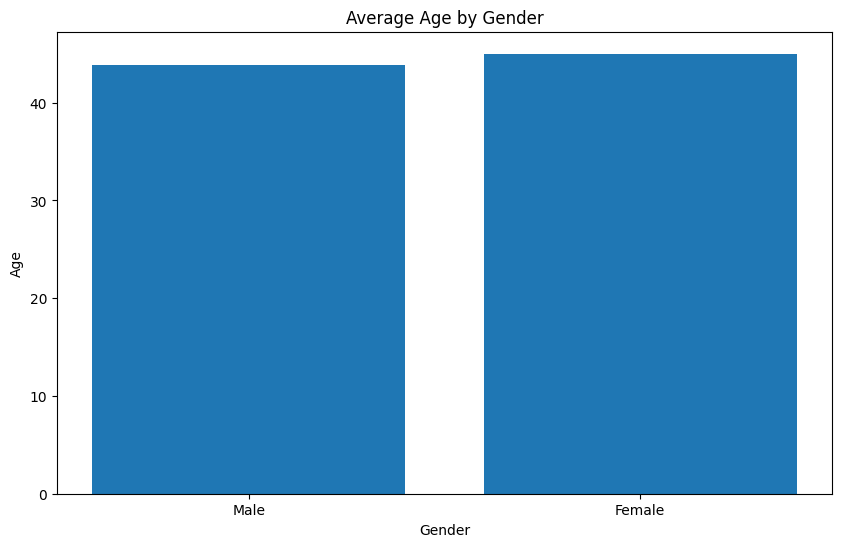

In [546]:
male_avg_age = df[df['Gender'] == 'Male']['Age'].mean()
female_avg_age = df[df['Gender'] == 'Female']['Age'].mean()
print(f"Male average age: {male_avg_age}")
print(f"Female average age: {female_avg_age}")

# Create a bar chart of average age by gender
plt.figure(figsize=(10,6))
plt.bar(['Male', 'Female'], [male_avg_age, female_avg_age])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

## 2. Which department has the highest number of employees?

Department with the most employees: IT (246 employees)


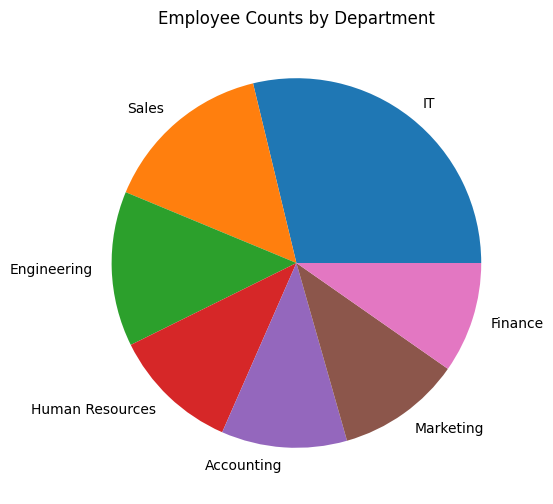

In [547]:
dept_counts = df['Department'].value_counts()
print(f"Department with the most employees: {dept_counts.idxmax()} ({dept_counts.max()} employees)")

# Create a pie chart of employee counts by department
plt.figure(figsize=(12,6))
plt.pie(dept_counts.values, labels=dept_counts.index)
plt.title('Employee Counts by Department')
plt.show()

## 3. What is the most common job title in the dataset?

In [548]:
common_job = df['Job Title'].value_counts().idxmax()
print(f"The most common job title is: {common_job}")

The most common job title is: Manager


## 4. Are there any employees who have exited the company? If so, how many?

In [549]:
exit_count = df['Exit Date'].notnull().sum()
print(f"{exit_count} employees have exited the company.")

96 employees have exited the company.


## 5. What is the total annual salary paid out to all employees in the dataset?

In [550]:
total_salary = df['Annual Salary'].sum()
print(f"Total annual salary paid out: {total_salary}")

Total annual salary paid out: 93038903.89089184


## 6. Which business unit has the highest average bonus payout?

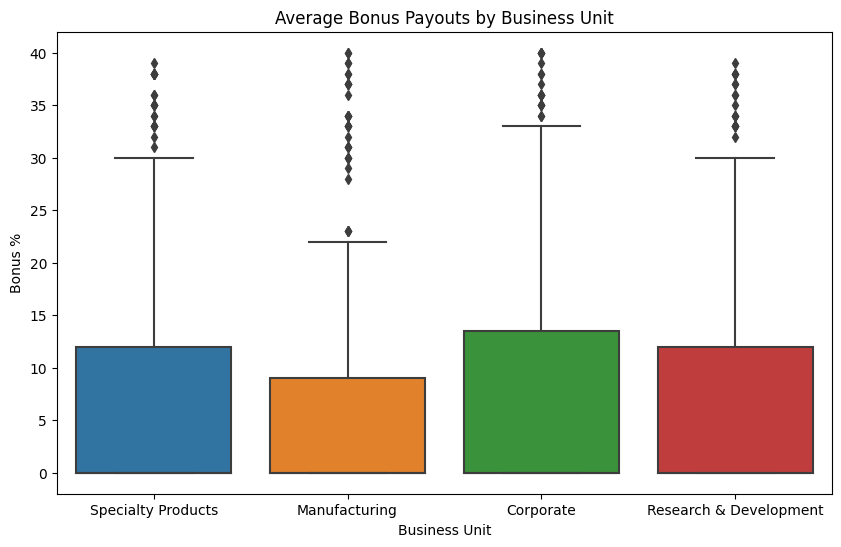

In [551]:
avg_bonus_by_unit = df.groupby('Business Unit')['Bonus %'].mean()

# Create the box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Business Unit', y='Bonus %', data=df)
plt.title('Average Bonus Payouts by Business Unit')
plt.xlabel('Business Unit')
plt.ylabel('Bonus %')
plt.show()

## 7. How many male vs female employees are in the Campany?

Number of male employees: 419
Number of female employees: 436


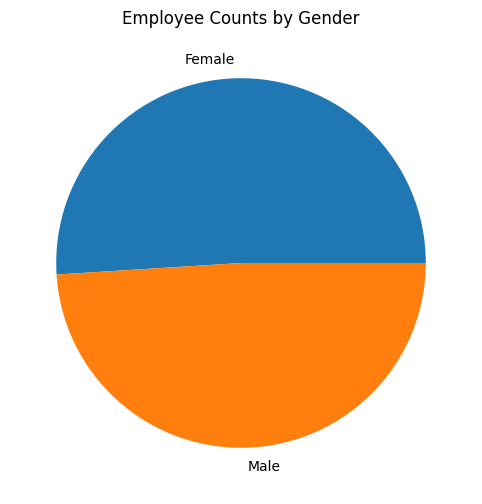

In [552]:
gender_counts = df['Gender'].value_counts()
print(f"Number of male employees: {gender_counts['Male']}")
print(f"Number of female employees: {gender_counts['Female']}")

# Create a pie chart of employee counts by gender
plt.figure(figsize=(12,6))
plt.pie(gender_counts.values, labels=gender_counts.index)
plt.title('Employee Counts by Gender')
plt.show()

## 8. What is the earliest hire date in the dataset?

In [553]:
earliest_hire_date = pd.to_datetime(df['Hire Date']).min()
print(f"The earliest hire date is: {earliest_hire_date}")

The earliest hire date is: 1993-04-30 00:00:00


## 9. Which country has the highest number of employees?

The country with the most employees is: United States (536 employees)


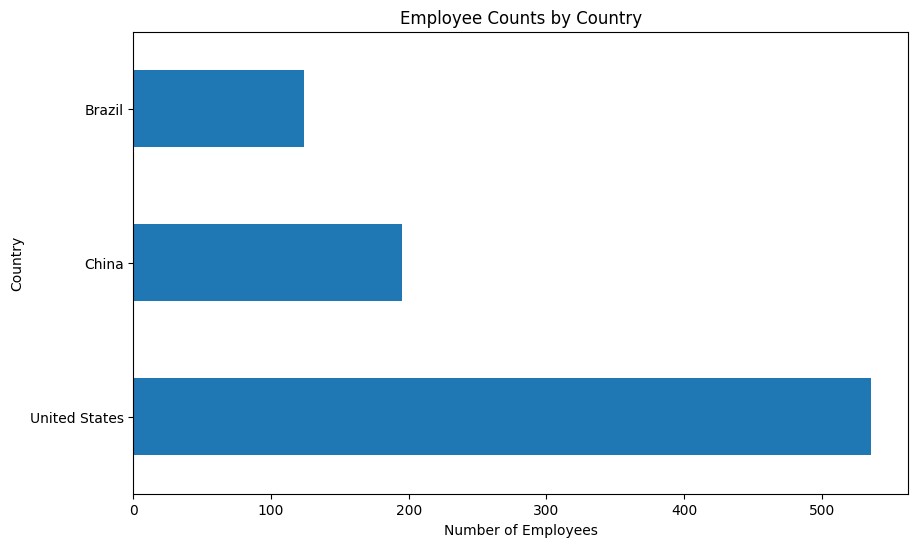

In [554]:
country_counts = df['Country'].value_counts()
print(f"The country with the most employees is: {country_counts.idxmax()} ({country_counts.max()} employees)")

# Create a horizontal bar chart of employee counts by country
plt.figure(figsize=(10,6))
country_counts.plot(kind='barh')
plt.title('Employee Counts by Country')
plt.xlabel('Number of Employees')
plt.ylabel('Country')
plt.show()

## 10. Are there any outliers in the annual salary column? If so, what are they?

In [555]:
# Define outliers as values that are more than 1.5 times the interquartile range from the median
q1, q3 = df['Annual Salary'].quantile([0.25, 0.75])
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr

outliers = df[df['Annual Salary'] >= upper_bound]

print(f"{len(outliers)} employees have Annual Salaries that are outliers:")
print(outliers['Annual Salary'])


33 employees have Annual Salaries that are outliers:
754    257489.0
260    245920.0
577    256084.0
30     255610.0
591    256592.0
185    252938.0
358    246538.0
270    240860.0
331    258700.0
507    242004.0
23     246400.0
16     254486.0
122    239395.0
555    258734.0
101    252140.0
337    246680.0
673    250639.0
182    257725.0
519    239868.0
729    239980.0
169    255892.0
173    254287.0
308    253330.0
341    246303.0
461    237489.0
305    238155.0
254    258115.0
714    246757.0
333    239270.0
757    235047.0
763    253741.0
235    249062.0
316    257296.0
Name: Annual Salary, dtype: float64


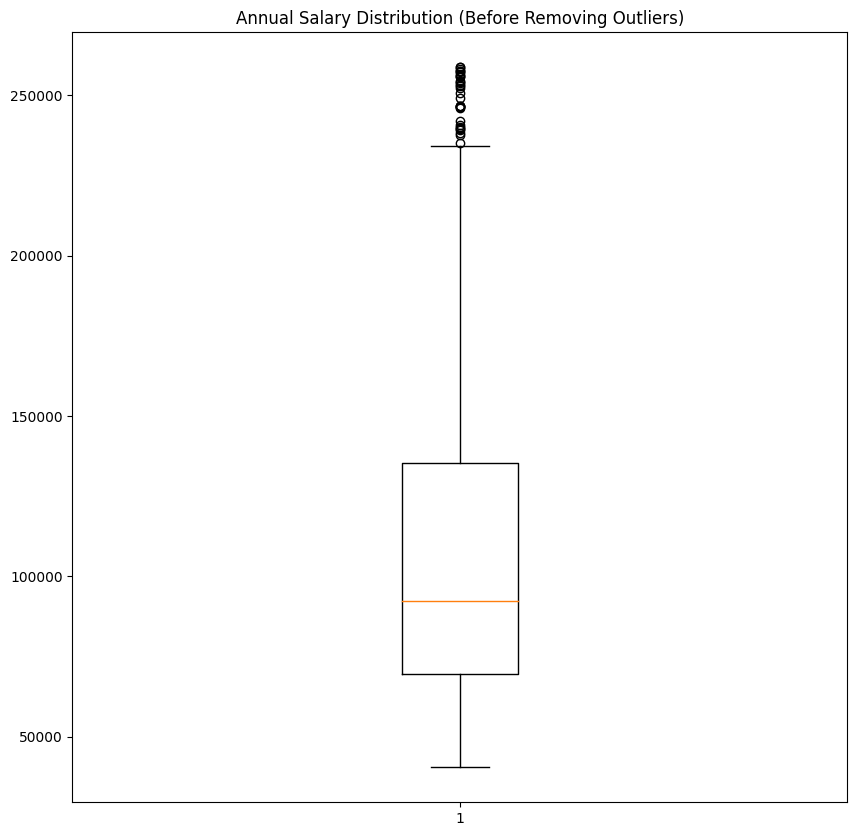

In [556]:
plt.figure(figsize=(10,10))
plt.boxplot(df['Annual Salary'])
plt.title('Annual Salary Distribution (Before Removing Outliers)')
plt.show()

## Drop Outliers Annual Salary

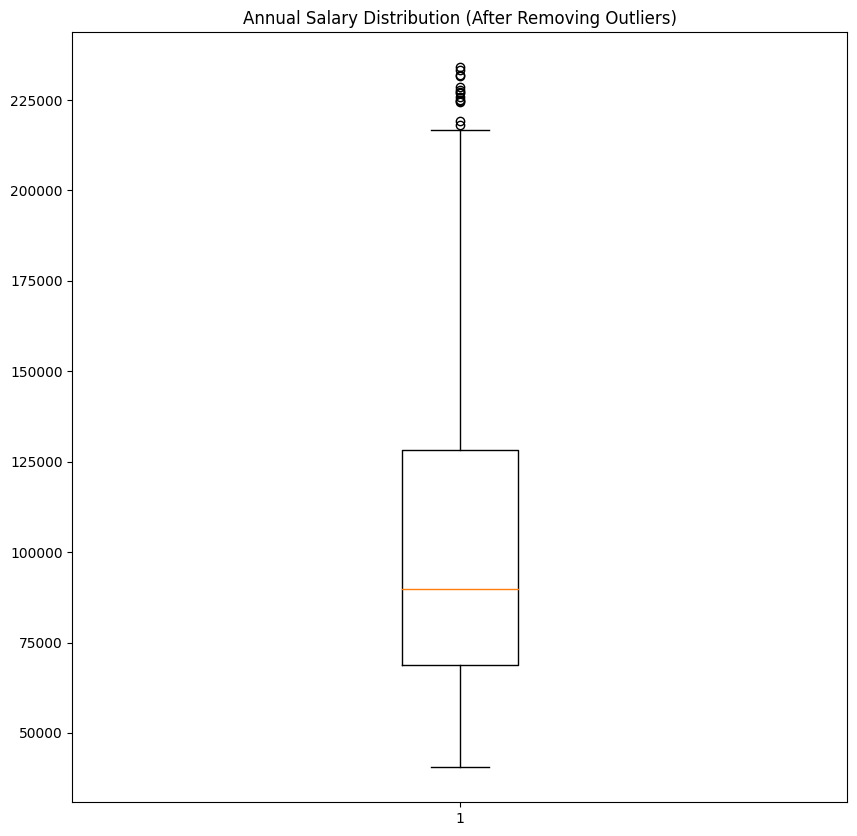

In [557]:
# Drop rows with outlier annual salaries
df = df[df['Annual Salary'] < upper_bound]
plt.figure(figsize=(10,10))
plt.boxplot(df['Annual Salary'])
plt.title('Annual Salary Distribution (After Removing Outliers)')
plt.show()

In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 750 to 756
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Employee ID    822 non-null    object        
 1   Full Name      822 non-null    object        
 2   Job Title      822 non-null    object        
 3   Department     822 non-null    object        
 4   Business Unit  822 non-null    object        
 5   Gender         822 non-null    object        
 6   Ethnicity      822 non-null    object        
 7   Age            822 non-null    int32         
 8   Hire Date      822 non-null    datetime64[ns]
 9   Annual Salary  822 non-null    float64       
 10  Bonus %        822 non-null    float64       
 11  Country        822 non-null    object        
 12  City           822 non-null    object        
 13  Exit Date      92 non-null     object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(10)
memory usage: 93.

## 11. How many employees have a job title that includes the word "manager"?

In [559]:
manager_count = df[df['Job Title'].str.contains('manager', case=False)]['Job Title'].count()
print(f"There are {manager_count} employees with a job title that includes the word 'manager'.")

There are 191 employees with a job title that includes the word 'manager'.


## 12. How does the salary of employees depand on number of years employees have been with the company?

C:\Users\Moham\AppData\Local\Temp\ipykernel_6248\2983214750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years with company'] = (pd.Timestamp.now() - df['Hire Date']).dt.days / 365


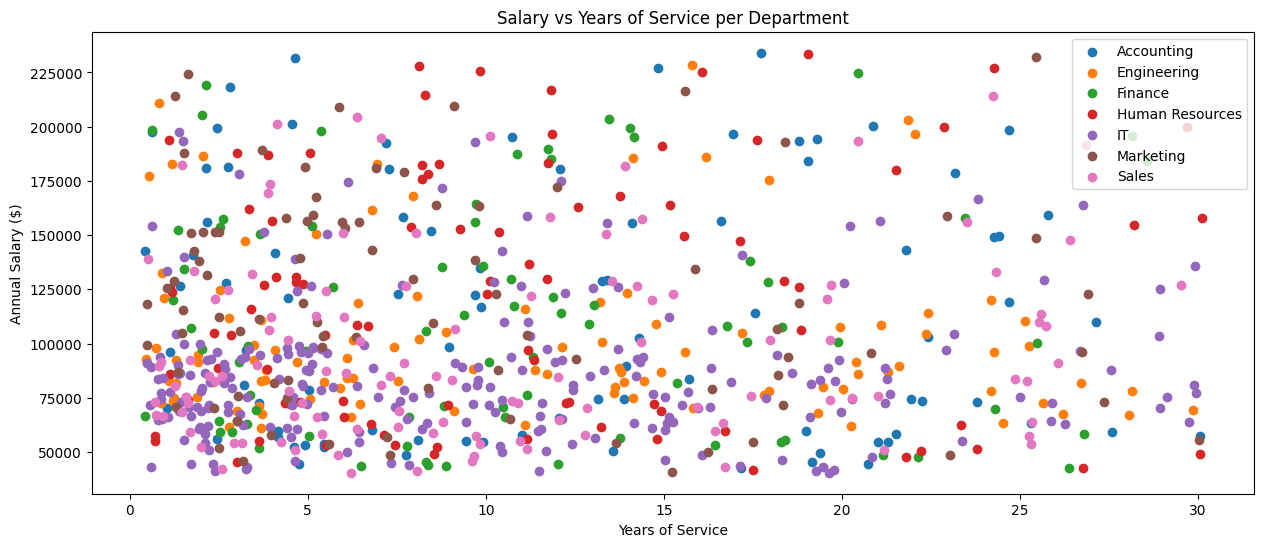

In [560]:
# Calculate the number of years an employee has been with the company
df['years with company'] = (pd.Timestamp.now() - df['Hire Date']).dt.days / 365

grouped_df = df.groupby(['Department', 'years with company'])['Annual Salary'].mean().reset_index()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(15, 6))
for Department in grouped_df['Department'].unique():
    data = grouped_df[grouped_df['Department'] == Department]
    ax.scatter(data['years with company'], data['Annual Salary'], label=Department)
plt.title('Salary vs Years of Service per Department')
plt.xlabel('Years of Service')
plt.ylabel('Annual Salary ($)')
plt.legend()
plt.show()

## 13. What is the average salary for employees with a job title that includes the word "manager"?

In [561]:
manager_avg_salary = df[df['Job Title'].str.contains('manager', case=False)]['Annual Salary'].mean()
print(f"The average salary for employees with a job title that includes 'manager' is ${manager_avg_salary:,.2f} per year.")

The average salary for employees with a job title that includes 'manager' is $122,977.26 per year.


## 14. How many employees have been with the company for more than 10 years?

In [562]:
current_date = pd.Timestamp.now()
long_employees = df[(current_date - df['Hire Date']).dt.days > 10*365]['Employee ID'].count()
print(f"{long_employees} employees have been with the company for more than 10 years.")

367 employees have been with the company for more than 10 years.


## 15. How many employees have a job title that includes the word "analyst"?

In [563]:
analyst_count = df[df['Job Title'].str.contains('analyst', case=False)]['Job Title'].count()
print(f"There are {analyst_count} employees with a job title that includes the word 'analyst'.")

There are 200 employees with a job title that includes the word 'analyst'.


## 16. What is the distribution of employee ages in the dataset?

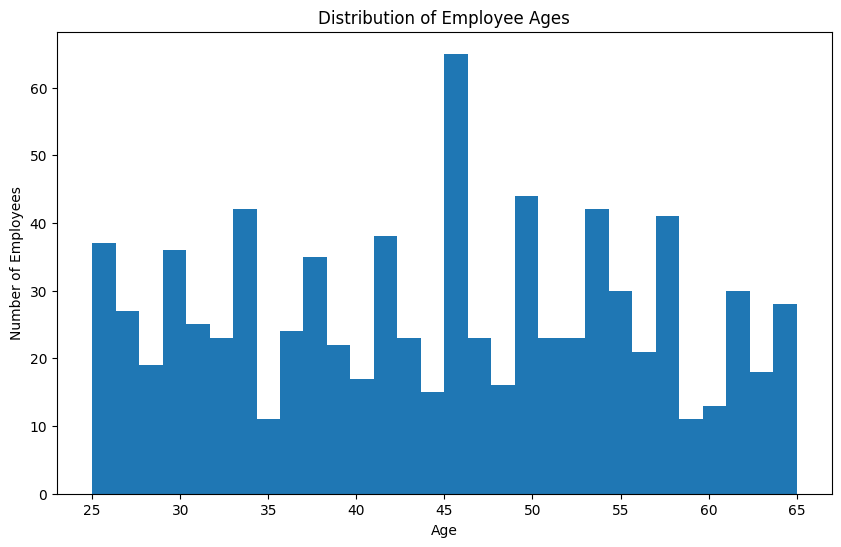

In [564]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30)
plt.title('Distribution of Employee Ages')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.show()

## 17. How many employees have a bonus greater than 10%?

In [565]:
high_earners = df[df['Bonus %'] > 10]['Employee ID'].count()
print(f"There are {high_earners} employees with an Bouns above 10%.")

There are 205 employees with an Bouns above 10%.


## 18. How many employees were hired in 2022 and comper with ather years?

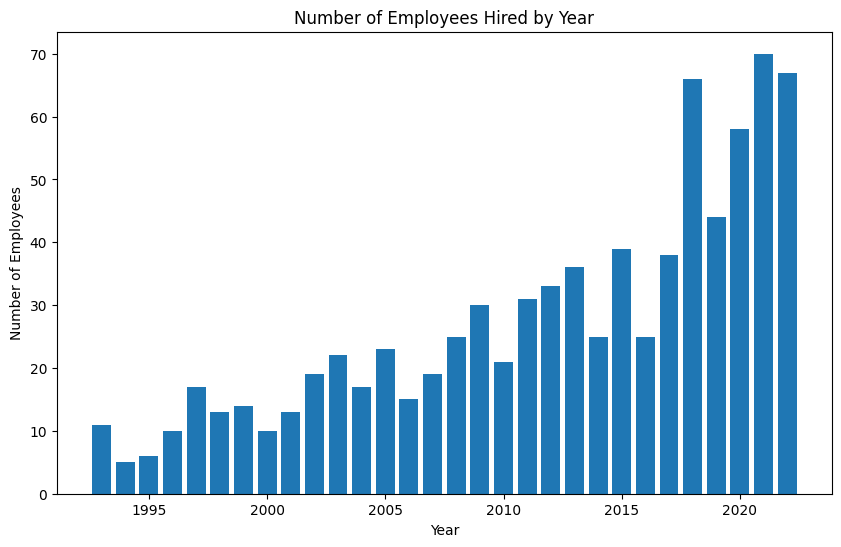

2021    70
2022    67
2018    66
2020    58
2019    44
2015    39
2017    38
2013    36
2012    33
2011    31
2009    30
2016    25
2014    25
2008    25
2005    23
2003    22
2010    21
2007    19
2002    19
2004    17
1997    17
2006    15
1999    14
2001    13
1998    13
1993    11
2000    10
1996    10
1995     6
1994     5
Name: Hire Date, dtype: int64


In [566]:
# Count the number of employees hired in each year
num_employees_by_year = df['Hire Date'].dt.year.value_counts()

# Create a bar chart to visualize the number of employees hired in each year
plt.figure(figsize=(10,6))
plt.bar(num_employees_by_year.index, num_employees_by_year.values)
plt.title('Number of Employees Hired by Year')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.show()
print(num_employees_by_year)

## 19. What is the highest annual salary in the dataset and which employee earned it?

In [568]:

# Find the employee(s) who earned the highest annual salary
max_salary = df['Annual Salary'].max()
top_earners = df[df['Annual Salary'] == max_salary]['Full Name'].tolist()

print(f"The highest annual salary in the dataset is ${max_salary}.")
print("The employee(s) who earned this salary are:")
for name in top_earners:
    print(name)

The highest annual salary in the dataset is $234064.0.
The employee(s) who earned this salary are:
Kinsley Tran


## 20. Are there any correlations between age, annual salary, and bonus payout among employees in the dataset?

Correlation matrix:
                    years with company  Annual Salary   Bonus %
years with company            1.000000       0.014685  0.020032
Annual Salary                 0.014685       1.000000  0.896164
Bonus %                       0.020032       0.896164  1.000000


<Axes: >

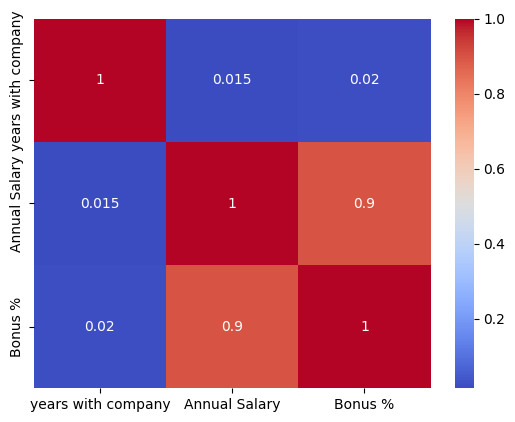

In [569]:
corr_matrix = df[['years with company', 'Annual Salary', 'Bonus %']].corr()
print("Correlation matrix:")
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [570]:
df.to_csv('file.csv', index=False)